In [3]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[1., -1., 2.],
                   [2., 0., 0.],
                   [0., 1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [4]:
scaler.mean()

AttributeError: 'StandardScaler' object has no attribute 'mean'

In [5]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [6]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [7]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [8]:
print("mean:", X_scaled.mean(axis=0),", std:", X_scaled.std(axis=0))

mean: [0. 0. 0.] , std: [1. 1. 1.]


In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [10]:
X_test = np.array([[-3., -1., 4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

In [11]:
min_max_scaler.scale_

array([0.5       , 0.5       , 0.33333333])

In [12]:
min_max_scaler.min_

array([0.        , 0.5       , 0.33333333])

In [13]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [14]:
X_test = np.array([[-3., -1., 4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)

In [15]:
X_test_maxabs

array([[-1.5, -1. ,  2. ]])

In [16]:
max_abs_scaler.scale_

array([2., 1., 2.])

In [17]:
X = [[ 1., -1., 2.],
     [ 2., 0., 0.],
     [ 0., 1., -1.]]

X_normalized = preprocessing.normalize(X, norm='l2')
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [18]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OrdinalEncoder()

In [19]:
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

In [20]:
enc = preprocessing.OrdinalEncoder()

In [21]:
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [nan],
       [ 0.]])

In [23]:
enc = preprocessing.OrdinalEncoder(encoded_missing_value=-1)
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [-1.],
       [ 0.]])

In [24]:
import pandas as pd

In [25]:
spreadsheet = pd.read_csv('/home/hara/Projects/University/AI/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [26]:
spreadsheet.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
spreadsheet.to_numpy()

array([['7590-VHVEG', 'Female', 0, ..., 29.85, '29.85', 'No'],
       ['5575-GNVDE', 'Male', 0, ..., 56.95, '1889.5', 'No'],
       ['3668-QPYBK', 'Male', 0, ..., 53.85, '108.15', 'Yes'],
       ...,
       ['4801-JZAZL', 'Female', 0, ..., 29.6, '346.45', 'No'],
       ['8361-LTMKD', 'Male', 1, ..., 74.4, '306.6', 'Yes'],
       ['3186-AJIEK', 'Male', 0, ..., 105.65, '6844.5', 'No']],
      dtype=object)

In [28]:
ex = spreadsheet.to_numpy()

In [31]:
scaler = preprocessing.StandardScaler().fit(ex)

ValueError: could not convert string to float: '7590-VHVEG'

In [35]:
enc = preprocessing.OrdinalEncoder(encoded_missing_value=-1)
transformed = enc.fit_transform(ex)
transformed

array([[5.375e+03, 0.000e+00, 0.000e+00, ..., 1.420e+02, 2.505e+03,
        0.000e+00],
       [3.962e+03, 1.000e+00, 0.000e+00, ..., 4.980e+02, 1.466e+03,
        0.000e+00],
       [2.564e+03, 1.000e+00, 0.000e+00, ..., 4.360e+02, 1.570e+02,
        1.000e+00],
       ...,
       [3.367e+03, 0.000e+00, 0.000e+00, ..., 1.370e+02, 2.994e+03,
        0.000e+00],
       [5.934e+03, 1.000e+00, 1.000e+00, ..., 7.950e+02, 2.660e+03,
        1.000e+00],
       [2.226e+03, 1.000e+00, 0.000e+00, ..., 1.388e+03, 5.407e+03,
        0.000e+00]])

In [36]:
scaler = preprocessing.StandardScaler().fit(transformed)

In [37]:
scaler

StandardScaler()

In [38]:
scaler.mean_

array([3.52100000e+03, 5.04756496e-01, 1.62146812e-01, 4.83032799e-01,
       2.99588244e-01, 3.23711487e+01, 9.03166264e-01, 9.40508306e-01,
       8.72923470e-01, 7.90004260e-01, 9.06431918e-01, 9.04444129e-01,
       7.97103507e-01, 9.85375550e-01, 9.92474798e-01, 6.90472810e-01,
       5.92219225e-01, 1.57432912e+00, 6.83524776e+02, 3.25779412e+03,
       2.65369871e-01])

In [39]:
scaler.scale_

array([2.03313895e+03, 4.99977375e-01, 3.68585436e-01, 4.99712031e-01,
       4.58077644e-01, 2.45577374e+01, 2.95731235e-01, 9.48486691e-01,
       7.37743961e-01, 8.59786459e-01, 8.80099984e-01, 8.79886380e-01,
       8.61489396e-01, 8.84939033e-01, 8.85027874e-01, 8.33696040e-01,
       4.91422033e-01, 1.06802818e+00, 4.78477549e+02, 1.88855941e+03,
       4.41529956e-01])

In [40]:
ex_scaled = scaler.transform(transformed)

In [41]:
ex_scaled

array([[ 0.91189045, -1.00955867, -0.43991649, ..., -1.13176632,
        -0.39860759, -0.60102348],
       [ 0.21690598,  0.99053183, -0.43991649, ..., -0.38773977,
        -0.94876238, -0.60102348],
       [-0.47070074,  0.99053183, -0.43991649, ..., -0.51731743,
        -1.64188328,  1.66382851],
       ...,
       [-0.07574495, -1.00955867, -0.43991649, ..., -1.14221613,
        -0.13968008, -0.60102348],
       [ 1.18683477,  0.99053183,  2.27315869, ...,  0.23297901,
        -0.31653445,  1.66382851],
       [-0.63694614,  0.99053183, -0.43991649, ...,  1.4723266 ,
         1.13801338, -0.60102348]])

In [42]:
print("mean:", ex_scaled.mean(axis=0),", std:", ex_scaled.std(axis=0))

mean: [ 1.27369048e-17 -3.63190948e-17  3.11857123e-16 -5.87505497e-17
  3.15427555e-16 -2.67979432e-18 -2.79739000e-16  3.64909169e-16
  2.84799083e-16  5.35643595e-17  5.89680859e-16 -1.81847690e-16
 -1.81532420e-16 -1.13434117e-16 -5.64806062e-16  1.75290076e-17
 -9.22795057e-17 -5.42264263e-18 -2.98560615e-17  1.50383752e-17
 -1.65422127e-16] , std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [43]:
ex_normalized = preprocessing.normalize(transformed, norm='l2')
ex_normalized

array([[9.06138521e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.39389153e-02, 4.22302697e-01, 0.00000000e+00],
       [9.31377661e-01, 2.35077653e-04, 0.00000000e+00, ...,
        1.17068671e-01, 3.44623839e-01, 0.00000000e+00],
       [9.84055068e-01, 3.83796829e-04, 0.00000000e+00, ...,
        1.67335417e-01, 6.02561021e-02, 3.83796829e-04],
       ...,
       [7.46939197e-01, 0.00000000e+00, 0.00000000e+00, ...,
        3.03922394e-02, 6.64192443e-01, 0.00000000e+00],
       [9.05769305e-01, 1.52640597e-04, 1.52640597e-04, ...,
        1.21349275e-01, 4.06023989e-01, 1.52640597e-04],
       [3.70374733e-01, 1.66385774e-04, 0.00000000e+00, ...,
        2.30943455e-01, 8.99647881e-01, 0.00000000e+00]])

In [44]:
x_train = np.array([1,2,3])
y_train = np.array([2,3,6])
type(x_train)

numpy.ndarray

In [45]:
x_train.shape

(3,)

In [46]:
x_train = x_train.reshape(3,1)
x_train.shape

(3, 1)

(3, 1) (3,)


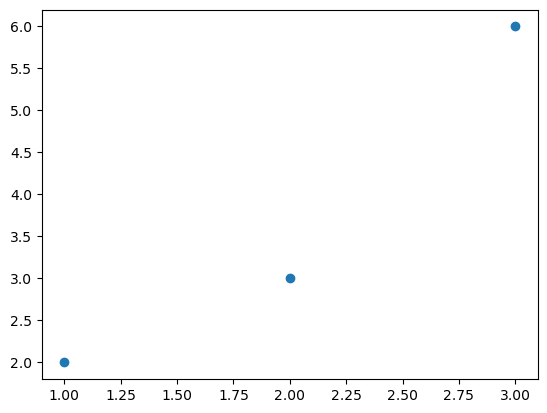

In [49]:
plt.scatter(x_train, y_train)
print(x_train.shape, y_train.shape)

In [48]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

<Axes: title={'center': 'A nice plot'}, xlabel='$x$', ylabel='$y$'>

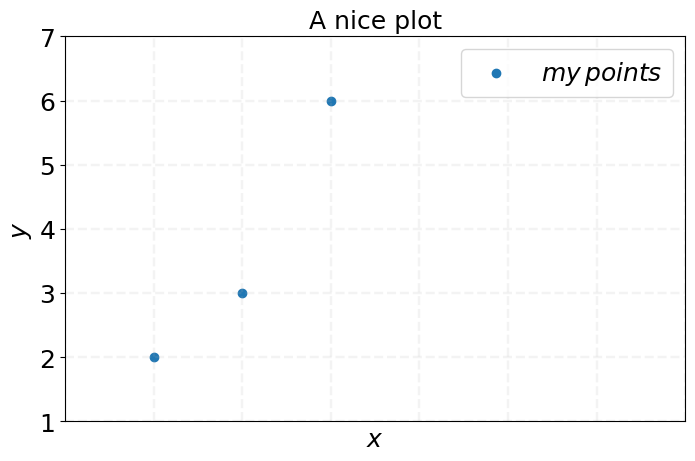

In [53]:
def nice_scatterplot(x,y,title):
    f_size = 18
    fig, ax = plt.subplots(1,1, figsize=(8,5))
    
    ax.set_xlim(np.min(x)-1, np.max(y)+1)
    ax.set_ylim(np.min(y)-1, np.max(y)+1)
    
    ax.tick_params(labelsize = f_size)
    
    ax.tick_params(labelbottom=False, bottom=False)
    
    ax.set_xlabel(r'$x$', fontsize=f_size)
    ax.set_ylabel(r'$y$', fontsize=f_size)
    
    ax.set_title(title, fontsize = f_size)
    
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)
    
    ax.scatter(x,y,label=r'$my\,points$')
    ax.legend(loc='best', fontsize=f_size)
    
    return ax

nice_scatterplot(x_train, y_train, 'A nice plot')

In [55]:
xx = np.array([[1,2,3],[4,6,8]])
xxx = xx.reshape(-1,2)
xxx.shape

(3, 2)

In [56]:
x_train = x_train.reshape(x_train.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)

print(x_train.shape)

(3, 1)


In [57]:
y_bar = np.mean(y_train)
x_bar = np.mean(x_train)

numerator = np.sum((x_train - x_bar) * (y_train - y_bar))
denominator = np.sum((x_train - x_bar)**2)

print(numerator.shape, denominator.shape)

() ()


In [58]:
a = numerator/denominator

b = y_bar - a * x_bar

print("The best-fit line is {0:3.2f} + {1:3.2f} * x".format(b,a))
print(f"THe best fit is {b}")

The best-fit line is -0.33 + 2.00 * x
THe best fit is -0.3333333333333335


In [59]:
def simple_linear_regression_fit(x_train:np.ndarray, y_train:np.ndarray) -> np.ndarray:
    """
    Inputs:
    x_train: a (num observations by 1) array holding the values of the predictor variabl
    y_train: a (num observations by 1) array holding the values of the response variable
    
    Returns:
    beta_vals: a (num_features by 1) array holding the intercept and slope coefficients
    """
    
    if len(x_train.shape) < 2:
        print("Reshaping features array.")
        x_train = x_train.reshape(x_train.shape[0], 1)
    
    if len(y_train.shape) < 2:
        print("Reshaping observations array.")
        y_train = y_train.reshape(y_train.shape[0], 1)
    
    y_bar = np.mean(y_train)
    x_bar = np.mean(x_train)
    
    numerator = np.sum((x_train - x_bar) * (y_train - y_bar))
    denominator = np.sum((x_train - x_bar)**2)
    
    a = numerator/denominator
    
    b = y_bar - a * x_bar
    
    return np.array([b,a])

In [60]:
x_train = np.array([1,2,3])
y_train = np.array([2,2,4])

coefficients = simple_linear_regression_fit(x_train, y_train)

a = coefficients[1]
b = coefficients[0]

print("The best-fit line is {1:8.6f} * x + {0:8.6f}.".format(a,b))

Reshaping features array.
Reshaping observations array.
The best-fit line is 0.666667 * x + 1.000000.


Text(0, 0.5, '$y$')

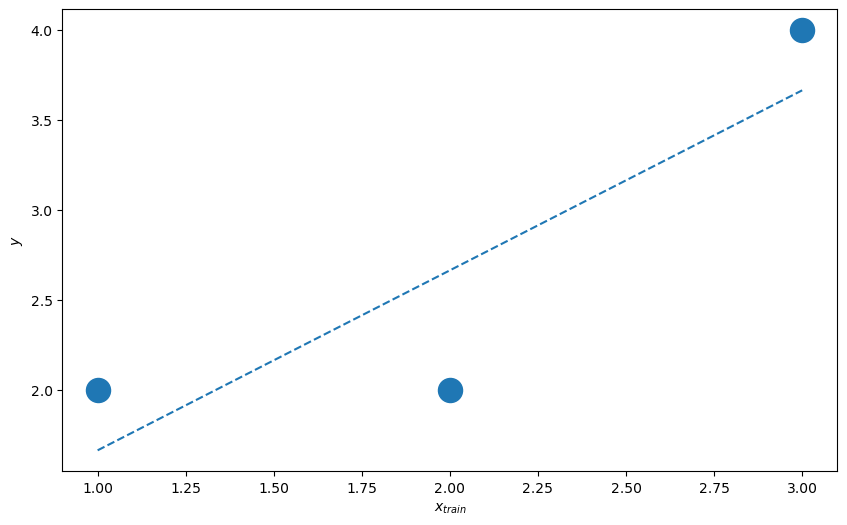

In [61]:
fig_scat, ax_scat = plt.subplots(1,1,figsize=(10,6))

xtrain = np.array([[1,2,3]]).T

best_fit = b + a * x_train

ax_scat.scatter(x_train, y_train, s=300, label='Training Data')
ax_scat.plot(x_train, best_fit, ls='--', label='Best Fit Line')

ax_scat.set_xlabel(r'$x_{train}$')
ax_scat.set_ylabel(r'$y$')

In [62]:
import statsmodels.api as sm

In [63]:
X = sm.add_constant(x_train)

print(X)

toyregr_sm = sm.OLS(y_train, X)

results_sm = toyregr_sm.fit()

beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print(f'The regression coef from statsmodel are: beta_0 = {beta0_sm:8.6f} and beta_1 = {beta1_sm:8.6f}')

[[1. 1.]
 [1. 2.]
 [1. 3.]]
The regression coef from statsmodel are: beta_0 = 0.666667 and beta_1 = 1.000000


In [64]:
import warnings
warnings.filterwarnings('ignore')
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     3.000
Date:                Mon, 06 Mar 2023   Prob (F-statistic):              0.333
Time:                        15:16:13   Log-Likelihood:                -2.0007
No. Observations:                   3   AIC:                             8.001
Df Residuals:                       1   BIC:                             6.199
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667      1.247      0.535      0.6

In [65]:
from sklearn import linear_model

In [69]:
x_train = x_train.reshape(x_train.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)

toyregr = linear_model.LinearRegression()

results = toyregr.fit(x_train, y_train)

beta0_skl = results.intercept_
beta1_skl = results.coef_[0]

print(f'The regression coef from statsmodel are: beta_0 = {beta0_skl:8.6f} and beta_1 = {beta1_skl:8.6f}')

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [70]:
df = pd.read_csv('Salary_dataset.csv')

In [71]:
print(df.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print(df.head())
X = np.array(df['YearsExperience'])
y = np.array(df['Salary'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [73]:
X_train

array([ 5.4,  8. ,  3. ,  5.2,  3.3,  4.6,  8.3,  6.9,  1.4, 10.6,  3.1,
        2.3,  6. ,  6.1,  3.8,  3.3,  9.1,  2.1,  1.2,  7.2,  5. ,  4.1])

In [74]:
y_train

array([ 83089., 101303.,  56643.,  66030.,  64446.,  61112., 113813.,
        91739.,  46206., 121873.,  60151.,  39892.,  81364.,  93941.,
        57190.,  54446., 105583.,  43526.,  39344.,  98274.,  67939.,
        56958.])

In [75]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

lr = LinearRegression().fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.94
Linear Regression-Test set score: 0.98


In [76]:
a = lr.coef_[0]

b = lr.intercept_

print(a, "* x +", b, "= y")

9379.710491946016 * x + 26049.720267542645 = y


In [77]:
lr.predict([[20]])

array([213643.93010646])

In [78]:
a * 20 + b

213643.93010646297

Text(0, 0.5, '$y$')

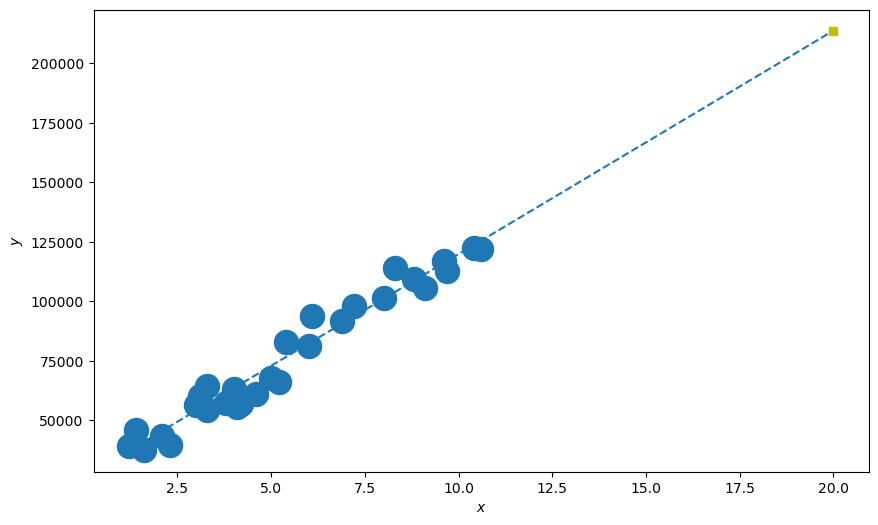

In [79]:
pred = lr.predict([[20]])
fig_scat, ax_scat = plt.subplots(1,1,figsize=(10,6))

x = X.T

best_fit = b + a * (np.append(x, [20]))

ax_scat.scatter(x, y, s=300, label='Training Data')
ax_scat.plot(np.append(x,[20]), best_fit, ls='--', label='Best Fit Line')

ax_scat.plot([20], pred, "ys", label="LinearRegression")
ax_scat.set_xlabel(r'$x$')
ax_scat.set_ylabel(r'$y$')